In [36]:
import pandas as pd
from datetime import datetime, timedelta
import random

# 15분 간격의 시간 데이터 생성 (1주일)
start_time = datetime.now().replace(second=0, microsecond=0, minute=0, hour=0)
times = [start_time + timedelta(minutes=15 * i) for i in range(1*24*4)]  # 1주일 동안의 15분 간격

# 예제 데이터 생성
data = {
    'timestamp': times,
    'temperature': [random.uniform(20, 25) for _ in times],
    'humidity': [random.uniform(30, 60) for _ in times],
    'set_point': [random.randint(20, 25) for _ in times]
}

df = pd.DataFrame(data)
df['time_in_minutes'] = df['timestamp'].apply(lambda x: x.hour * 60 + x.minute)

df


,timestamp,temperature,humidity,set_point,time_in_minutes
0,2024-07-10 00:00:00,20.469380,30.574895,22,0
1,2024-07-10 00:15:00,22.829858,36.429875,20,15
2,2024-07-10 00:30:00,23.751422,41.096376,23,30
3,2024-07-10 00:45:00,20.488922,46.559592,24,45
4,2024-07-10 01:00:00,20.151719,37.816917,21,60
...,...,...,...,...,...
91,2024-07-10 22:45:00,23.727670,33.549546,22,1365
92,2024-07-10 23:00:00,24.271057,33.812687,25,1380
93,2024-07-10 23:15:00,20.632920,36.936139,20,1395
94,2024-07-10 23:30:00,23.537204,39.439426,23,1410


In [37]:
from sklearn.cluster import KMeans

# K-means 클러스터링
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['temperature', 'humidity', 'time_in_minutes']])

df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,timestamp,temperature,humidity,set_point,time_in_minutes,cluster
0,2024-07-10 00:00:00,20.469380,30.574895,22,0,1
1,2024-07-10 00:15:00,22.829858,36.429875,20,15,1
2,2024-07-10 00:30:00,23.751422,41.096376,23,30,1
3,2024-07-10 00:45:00,20.488922,46.559592,24,45,1
4,2024-07-10 01:00:00,20.151719,37.816917,21,60,1
...,...,...,...,...,...,...
91,2024-07-10 22:45:00,23.727670,33.549546,22,1365,2
92,2024-07-10 23:00:00,24.271057,33.812687,25,1380,2
93,2024-07-10 23:15:00,20.632920,36.936139,20,1395,2
94,2024-07-10 23:30:00,23.537204,39.439426,23,1410,2


In [34]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes 모델 학습 및 예측
models = {}
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    X = cluster_data[['temperature', 'humidity', 'time_in_minutes']]
    y = cluster_data['set_point']
    print(f'{X=}, {y=}', '\n')
    
    model = GaussianNB()
    model.fit(X, y)
    models[cluster] = model

# 새로운 데이터 포인트 예시
new_data = {'temperature': 23, 'humidity': 42, 'time_in_minutes': 95}
new_df = pd.DataFrame([new_data])

# 군집 예측
new_df['cluster'] = kmeans.predict(new_df[['temperature', 'humidity', 'time_in_minutes']])

# 설정 값 예측
predicted_set_point = models[new_df['cluster'][0]].predict(new_df[['temperature', 'humidity', 'time_in_minutes']])
print(f'Predicted Set Point: {predicted_set_point[0]}')


X=     temperature   humidity  time_in_minutes
0      23.882404  39.479314                0
1      22.615967  43.407815               15
2      24.260232  47.368604               30
3      24.449034  31.296217               45
4      23.846902  33.198790               60
..           ...        ...              ...
603    21.434384  34.677224              405
604    20.010937  49.733210              420
605    24.658478  43.741370              435
606    22.960710  42.259503              450
607    20.468381  57.155602              465

[224 rows x 3 columns], y=0      25
1      25
2      22
3      20
4      20
       ..
603    24
604    25
605    22
606    23
607    22
Name: set_point, Length: 224, dtype: int64 

X=     temperature   humidity  time_in_minutes
32     23.091880  45.603295              480
33     21.937210  48.907245              495
34     20.639113  34.803882              510
35     22.205308  40.179029              525
36     23.891655  32.180067              540
..  

In [22]:
cluster_data

,timestamp,temperature,humidity,set_point,time_in_minutes,cluster
64,2024-07-10 16:00:00,22.162000,39.988808,22,960,2
65,2024-07-10 16:15:00,21.502638,56.940050,22,975,2
66,2024-07-10 16:30:00,23.902783,47.798734,21,990,2
67,2024-07-10 16:45:00,20.971614,47.562504,25,1005,2
68,2024-07-10 17:00:00,23.181689,53.144727,21,1020,2
...,...,...,...,...,...,...
667,2024-07-16 22:45:00,23.858483,54.330391,21,1365,2
668,2024-07-16 23:00:00,20.600505,54.523272,24,1380,2
669,2024-07-16 23:15:00,22.488026,36.985710,22,1395,2
670,2024-07-16 23:30:00,22.049341,32.431438,23,1410,2


### 2020-Smart Thermostat based on Machine Learning and Rule Engine

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 샘플 데이터 생성
data = np.array([
    [8.0, 22], [8.15, 21], [8.30, 23], [12.0, 24], [12.15, 24],
    [17.0, 20], [17.15, 21], [20.0, 18], [20.15, 19]
])

# 시간과 온도 설정 값 분리
times = data[:, 0].reshape(-1, 1)
set_points = data[:, 1]

In [3]:
times

array([[ 8.  ],
       [ 8.15],
       [ 8.3 ],
       [12.  ],
       [12.15],
       [17.  ],
       [17.15],
       [20.  ],
       [20.15]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

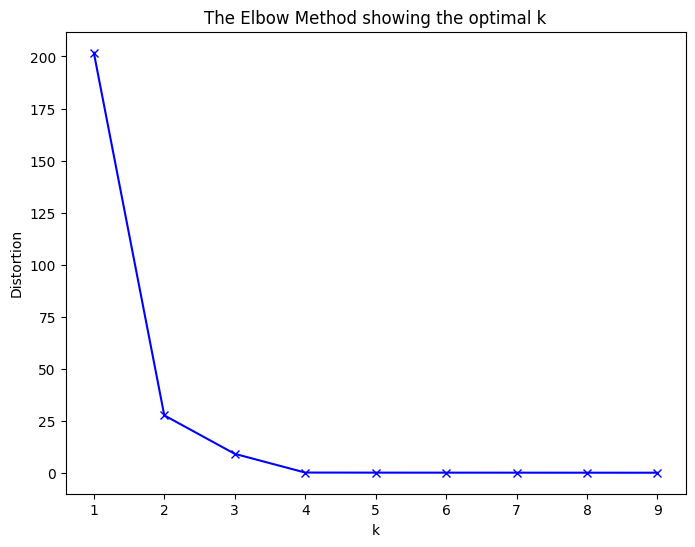

Rounded Cluster Centers:  [12.   18.5   8.25]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 샘플 데이터 생성
data = np.array([
    [8.0, 22], [8.15, 21], [8.30, 23], [12.0, 24], [12.15, 24],
    [17.0, 20], [17.15, 21], [20.0, 18], [20.15, 19]
])

# 시간과 온도 설정 값 분리
times = data[:, 0].reshape(-1, 1)
set_points = data[:, 1]

# Elbow Method를 사용하여 최적의 클러스터 수(K) 결정
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(times)
    distortions.append(kmeanModel.inertia_)

# Elbow Method 결과 시각화
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# K-means 클러스터링
optimal_k = 3  # Elbow Method를 통해 결정된 최적의 클러스터 수
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(times)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 클러스터 중심 값을 15분 간격으로 반올림
rounded_centers = np.round(cluster_centers * 4) / 4
print("Rounded Cluster Centers: ", rounded_centers.flatten())


In [11]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer

# 샘플 데이터 생성
data = np.array([
    [8.0, 22], [8.15, 21], [8.30, 23], [12.0, 24], [12.15, 24],
    [17.0, 20], [17.15, 21], [20.0, 18], [20.15, 19]
])

# 시간과 온도 설정 값 분리
times = data[:, 0].reshape(-1, 1)
set_points = data[:, 1]

# 클러스터 레이블 (K-means 결과)
labels = np.array([0, 0, 0, 1, 1, 2, 2, 2, 2])

# Naive Bayes를 사용하여 설정 값 예측
# 클러스터 레이블을 기준으로 설정 값 군집화
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
set_point_bins = discretizer.fit_transform(set_points.reshape(-1, 1)).astype(int).reshape(-1)

# Gaussian Naive Bayes 모델 학습
gnb = GaussianNB()
gnb.fit(times, set_point_bins)

# 예측 예제
test_times = np.array([[8.0], [12.0], [17.0]])
predicted_bins = gnb.predict(test_times)
predicted_set_points = discretizer.inverse_transform(predicted_bins.reshape(-1, 1))

# 결과 출력
print("Test Times: ", test_times.flatten())
print("Predicted Set Points: ", predicted_set_points.flatten())


Test Times:  [ 8. 12. 17.]
Predicted Set Points:  [23. 23. 21.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
